In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [19]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
df = df.iloc[:, 2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [21]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1:]

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((280, 2), (120, 2))

# **Scaling starts:**

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(X_train) #IMP to remember that fit only X_train data

StandardScaler()

In [27]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled, X_test_scaled #problem is this comes out as np array

In [31]:
X_train.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

In [32]:
# Converting np array to Dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [33]:
X_train_scaled, X_test_scaled

(          Age  EstimatedSalary
 0   -0.842522         0.130156
 1    0.041758         0.277702
 2    0.729530        -1.315791
 3    1.613809         1.103957
 4    0.827784        -1.404318
 ..        ...              ...
 275 -1.333788        -1.286281
 276 -1.137281        -1.050209
 277  0.533024         1.841685
 278  0.140011         0.189175
 279 -0.547762         0.454757
 
 [280 rows x 2 columns],
           Age  EstimatedSalary
 0    0.827784        -1.433827
 1    2.105076         0.513775
 2   -0.940775        -0.784626
 3    1.024290         0.749848
 4   -0.842522        -1.256772
 ..        ...              ...
 115 -1.039028        -1.492845
 116 -1.137281        -1.581373
 117 -0.056496         0.661320
 118  0.434771        -0.489535
 119 -0.253002        -0.282971
 
 [120 rows x 2 columns])

In [34]:
X_train_scaled.head()

,Age,EstimatedSalary
0,-0.842522,0.130156
1,0.041758,0.277702
2,0.729530,-1.315791
3,1.613809,1.103957
4,0.827784,-1.404318


In [35]:
scaler.mean_

array([3.75750000e+01, 7.05892857e+04])

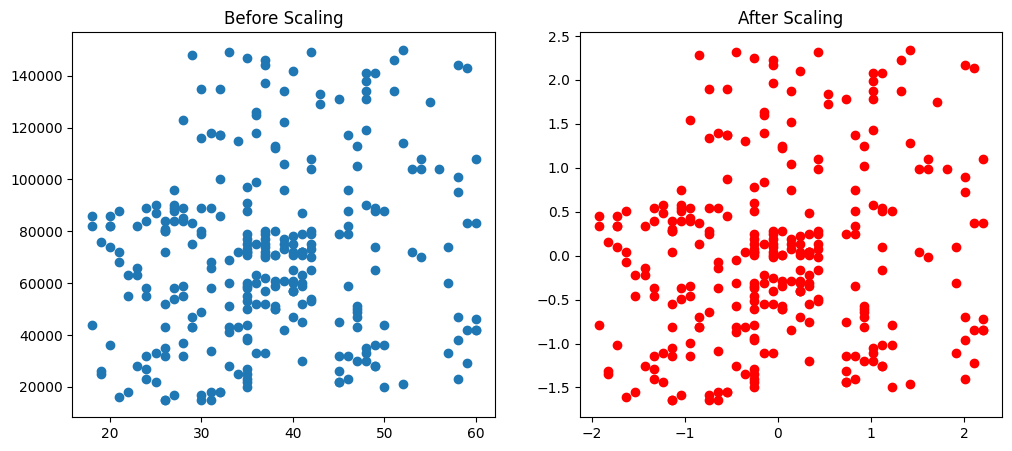

In [41]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train['Age'], X_train[ 'EstimatedSalary' ])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled[ 'Age'], X_train_scaled[ 'EstimatedSalary'], color='red')
ax2.set_title("After Scaling")
plt.show( )

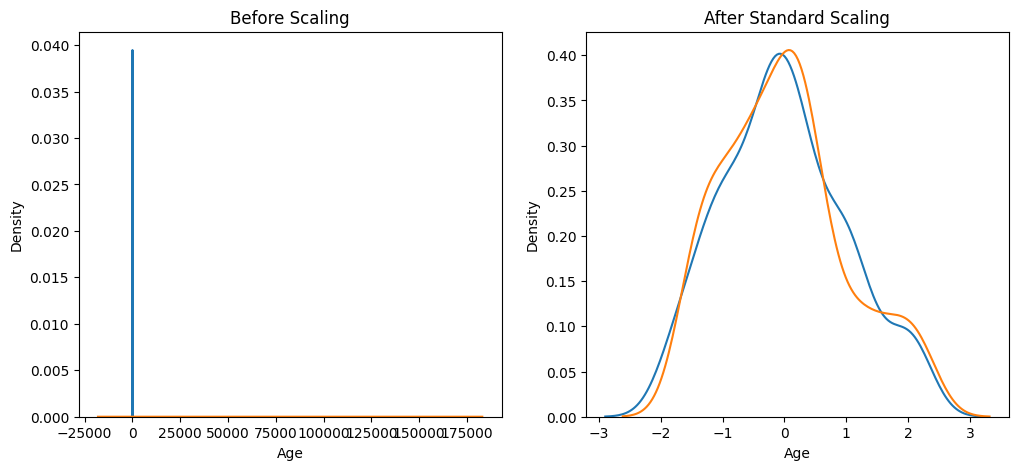

In [43]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparision of distributions

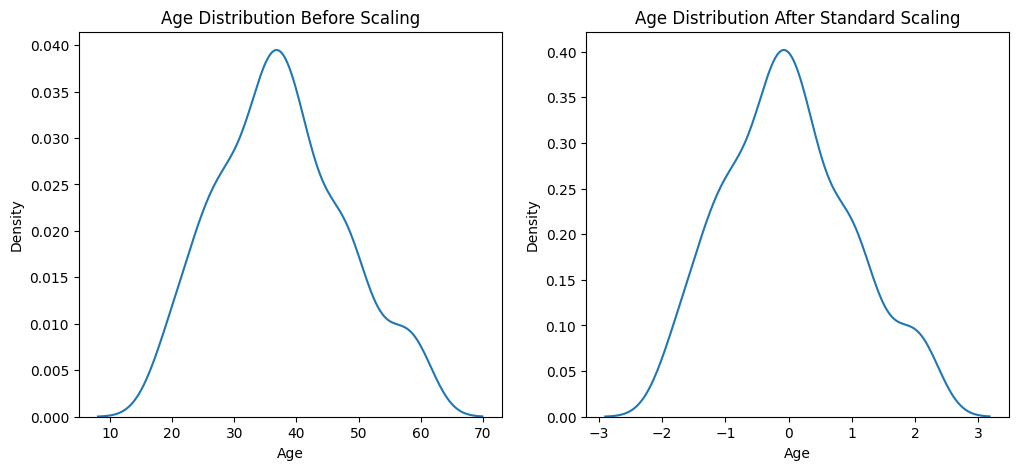

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

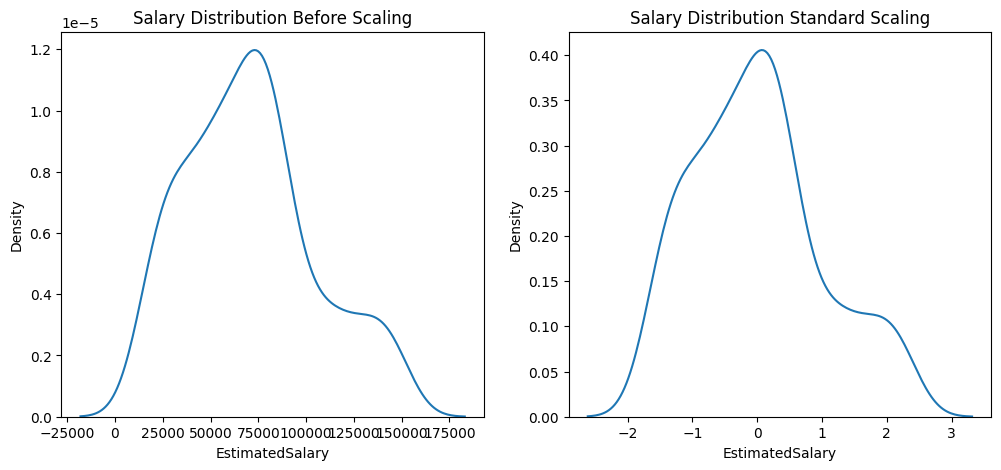

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Putting in ML models

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [47]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [48]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [49]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6083333333333333
Scaled 0.85


In [50]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred), r2_score(y_test, y_pred_scaled)

(-0.6438356164383561, 0.37044593412999127)